# Gradient Descent

Wiki: Gradient Descent is a first order iterative optimization algo for finding the local minima of a differentiable function. The idea is to take repeated steps in the opposite direction of the Gradient of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the process is then known as gradient ascent.

### Using Library and then manual implementation using the value of predetemrined slope

In [3]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

Making a small Regression data using the make regression function which was discussed in Multi linear Regression.

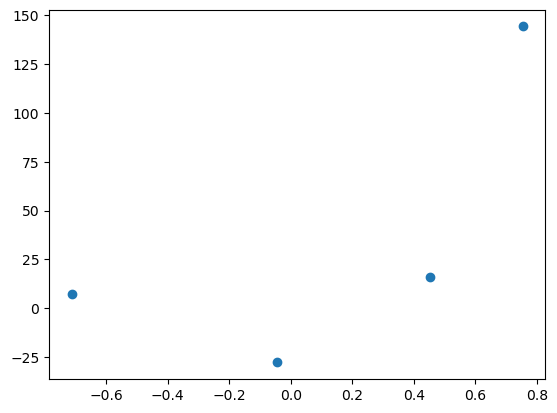

In [5]:
plt.scatter(X, y)

In [6]:
# Lets check for the values of Slope using OLS

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

lr.coef_

array([78.35063668])

In [7]:
lr.intercept_

26.15963284313262

This is to cross verify our Gradient descent results later

We will take the Slope value for now from the result, and only work on the intercept finding task.

Starting with a random value for b = 0 (the intercept)

In [8]:
y_pred = ((78.35*X) + 0).reshape(4)

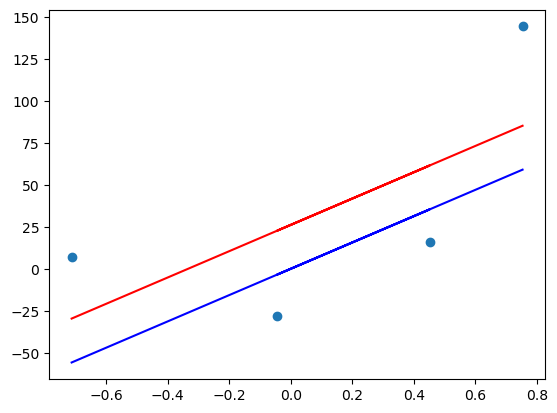

In [9]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'blue', label = 'b = 0')
plt.show()

In [16]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b) # this will give the slope for the given value of b
# ravel function is used to flatten an data series
# this slope is of the minimising function considering a fix value for m
loss_slope

-209.27763408209216

In [17]:
# lets take learning rate = 0.1
lrate = 0.1

step_size = loss_slope*lrate
step_size

-20.927763408209216

The step size the amount we will move along the curve to check for the lowest point eventually

Now we will find the new b

In [18]:
b = b - step_size
b

20.927763408209216

Lets plot and visualise how the result has changed

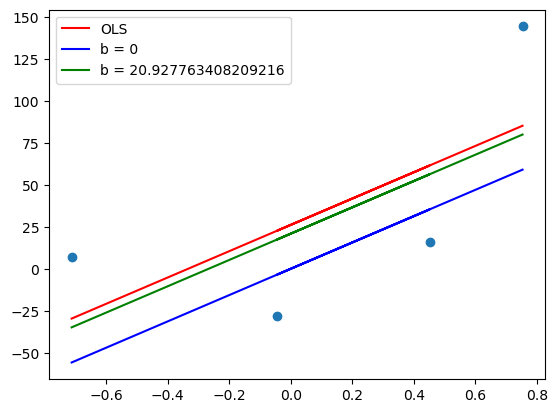

In [25]:
y_pred1 = ((m*X)+b).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'blue', label = 'b = 0')
plt.plot(X, y_pred1, color = 'green', label = f'b = {b}')
plt.legend()
plt.show()

Here, red is the desired line, and we have moved from blue to green, so this is great shift.

Lets repeat all that stuff in one go, New loss slope-> New step size -> New b -> New y_pred (while x, m, learn rate are constant as usual)

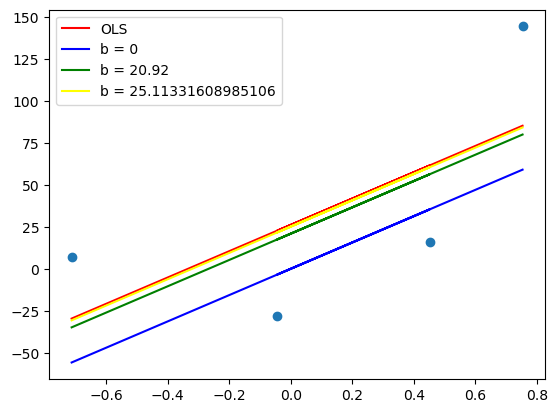

25.11331608985106


In [26]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
step_size = loss_slope*lrate
b = b - step_size
y_pred2 = ((m*X)+b).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'blue', label = 'b = 0')
plt.plot(X, y_pred1, color = 'green', label = f'b = 20.92')
plt.plot(X, y_pred2, color = 'yellow', label = f'b = {b}')
plt.legend()
plt.show()
print(b)

See the value of b, we are geeting closer to the desired result(b = 26.15), one more iteration.

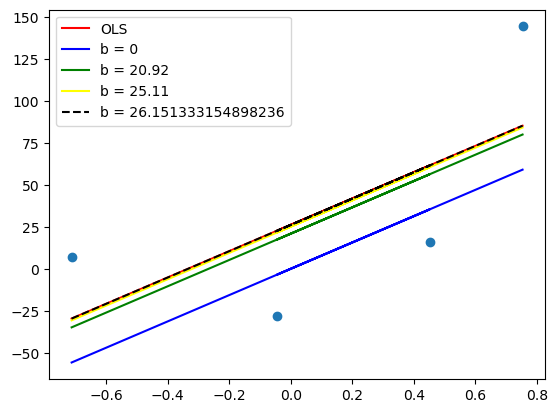

26.151333154898236


In [29]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
step_size = loss_slope*lrate
b = b - step_size
y_pred3 = ((m*X)+b).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'blue', label = 'b = 0')
plt.plot(X, y_pred1, color = 'green', label = 'b = 20.92')
plt.plot(X, y_pred2, color = 'yellow', label = 'b = 25.11')
plt.plot(X, y_pred3, color = 'black', label = f'b = {b}', linestyle = 'dashed')
plt.legend()
plt.show()
print(b)

We are onto it in just three iterations, even if our fist assumption is way absurd.